# Notebook Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_pca_correlation_graph

## Load Sample

In [10]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Standardize the data points X

In [11]:
X_std = StandardScaler().fit_transform(X)

### Compute the matrix of variance-covariance ∑

In [12]:
Cov_X_std = np.cov(X_std.T)
print(Cov_X_std)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### Compute eigenvectors and eigenvalues on the variance-covariance matrix.

In [13]:
eig_vals, eig_vecs = np.linalg.eig(Cov_X_std)
print('eigenvalues:\n', eig_vals, '\n')
print('eigenvectors:\n', eig_vecs)

eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386] 

eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Select the principal components to form the reduced feature space.

In [14]:
# calculating the total sum of Eigenvalues
tot = sum(eig_vals) 
print(tot)
 
# sorting Eigenvalues in decreasing order
exp_var = sorted(eig_vals, reverse=True)
 
# present values as percentages
exp_var = exp_var/tot * 100
 
# print the explained variance
print("Explained variance per PC:", exp_var)
 
# Computing and print the explained cumulative variance 
cum_exp_var = np.cumsum(exp_var)
print("Cumulative Explained Variance:",cum_exp_var)
 
# display the proportion of variance which is explained by the first two PC
print("Explained variance by PC1 and PC2:", sum(exp_var[0:2]))

4.026845637583892
Explained variance per PC: [72.96244541 22.85076179  3.66892189  0.51787091]
Cumulative Explained Variance: [ 72.96244541  95.8132072   99.48212909 100.        ]
Explained variance by PC1 and PC2: 95.81320720000164


### Construct the projection matrix from the selected k eigenvectors.

In [15]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

PR = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

### Project and visualize the data samples into the new reduced feature space.

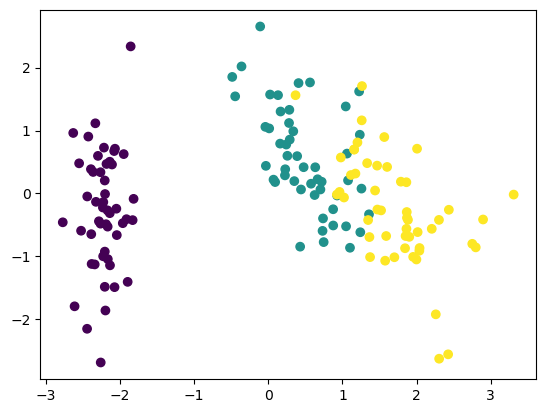

In [16]:
Y = X_std.dot(PR)
YL = np.append(Y, y.reshape(150, 1), axis=1) 

# plot the projected data
plt.scatter(x=YL[:,0], y=YL[:,1], c=YL[:,2])
plt.show()

# Calculating PCA the easy way

In [17]:
pca = PCA().fit(X_std)
 
var_exp = pca.explained_variance_ratio_ # extract the explaind variance ratios
print(var_exp)

[0.72962445 0.22850762 0.03668922 0.00517871]


In [18]:
cum_var_exp = np.cumsum(var_exp) # calculate the explained cumulative variance
print(cum_var_exp)

[0.72962445 0.95813207 0.99482129 1.        ]


In [19]:
# extract the Eigenvectors
eig_vecs = pca.components_
 
# use PCA to project the data to a two-dimensional feature space
Y = PCA(n_components=2).fit(X_std).transform(X_std)
pca = PCA().fit(X_std)

# PCA Correlation Graph

In [20]:
feature_names = ['sepal length','sepal width','petal length','petal width']

                 Dim 1     Dim 2
sepal length -0.890169 -0.360830
sepal width   0.460143 -0.882716
petal length -0.991555 -0.023415
petal width  -0.964979 -0.064000


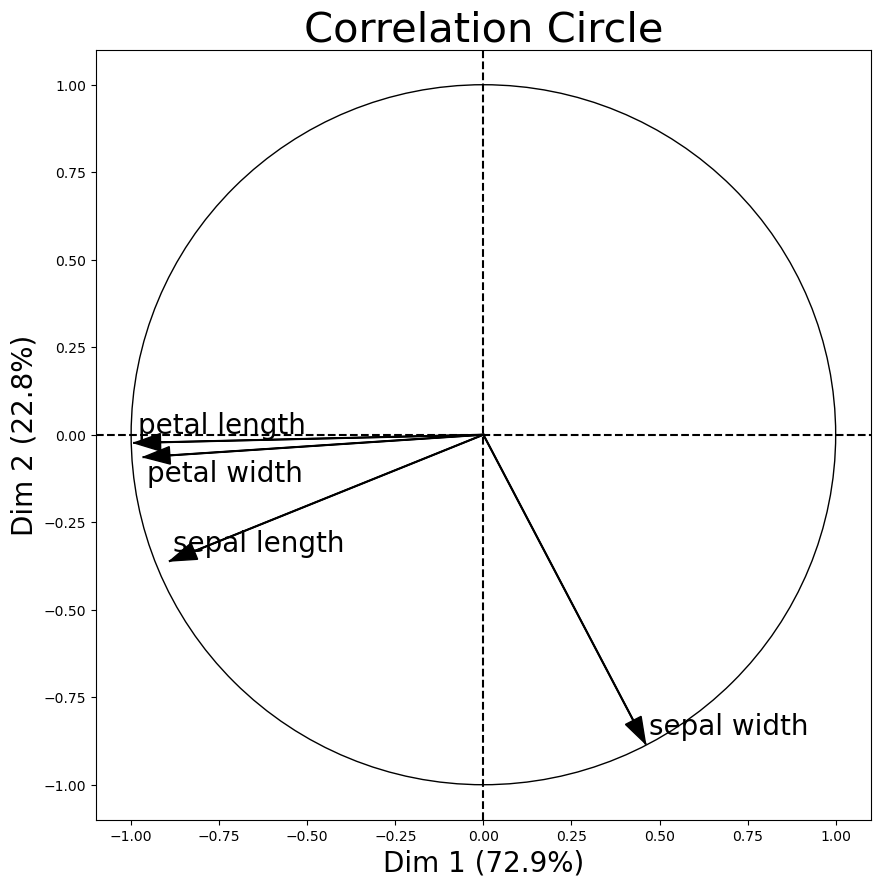

In [21]:
# calculete the correlation matrix and create a correlation graph
fig, cor_mat = plot_pca_correlation_graph(X_std, feature_names, dimensions=(1, 2), figure_axis_size=10)

print(cor_mat) # matrix for the 4 features